In [1]:
#JSON library to extract the Wikipedia data.
import json
#Pandas library to create DataFrames.
import pandas as pd
#NumPy library for converting data types.
import numpy as np
#Use regular expressions to find out just how many of each style are in our data.
import re

In [2]:
#Define a variable file_dir for the directory that's holding our data.
file_dir = "C:\\Users\leyva\Desktop\Berkeley Data Analytics Boot Camp\Movies_ETL\Resources"

In [3]:
#Open the Wikipedia JSON file to be read into the variable file, and use json.load() to save the data to a new variable.
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
#Check how many records were pulled in
len(wiki_movies_raw)

7311

In [5]:
#First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
#Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
#Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
#Since the Kaggle data is already in flat-file formats, we'll just pull them into Pandas DataFrames directly with the following code.
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [9]:
#Sample a handful of rows randomly
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
42803,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,345909,tt4623856,en,Wolves,"Anthony Keller, star of his NYC high school ba...",...,2016-10-25,0.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Everyone's playing their own game,Wolves,False,5.6,6.0
33645,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://www.brosbeforehosdefilm.nl/,230211,tt2947832,nl,Bros Before Hos,"Because of a bad marriage of their parents, tw...",...,2013-12-05,0.0,87.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Bros Before Hos,False,6.4,36.0
40357,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://jomafilms.com/,365339,tt3829874,en,Black Road,"In 2029, a cyborg drifter risks his life to pr...",...,2015-10-14,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't Ride Into Darkness Alone,Black Road,False,4.9,4.0
44190,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 16, 'nam...",NaN,400465,tt5740242,en,Hitler's Folly,"""Hitler's Folly"" explores what might have happ...",...,2016-06-03,0.0,67.0,[],Released,NaN,Hitler's Folly,False,3.4,4.0
34717,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,202239,tt0086142,en,Pristupit k Likvidatsii,Army and police are trying to fight crime in W...,...,1983-03-12,0.0,132.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Start Liquidation,False,3.0,1.0


In [10]:
#Sample a handful of rows randomly
ratings.sample(n=5)

,userId,movieId,rating,timestamp
10488642,108318,6502,2.5,1144102507
14755148,153396,8981,3.0,1476038174
15211683,158302,2858,5.0,1000840714
23260858,241400,2301,4.0,943191565
24082441,250054,292,1.0,1078881289


In [11]:
#Turn wiki_movies_raw into a DataFrame?
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [12]:
#wiki_movies_df.sample(n=5)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Convert to a list
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [14]:
#Create a list comprehension with the filter expression we created and save that to an intermediate variable wiki_movies.
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
#See how many movies are in wiki_movies with the len() function.
len(wiki_movies)

7080

In [15]:
#Make a DataFrame from wiki_movies, and there should only be 78 columns.
wiki_movies_dir_df = pd.DataFrame(wiki_movies)
wiki_movies_dir_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
589,https://en.wikipedia.org/wiki/The_Player_(film),1992,https://www.imdb.com/title/tt0105151/,The Player,Robert Altman,"[David Brown, Michael L. Tolkin, Nick Wechsler]",Michael Tolkin,NaN,"[The Player, by Michael Tolkin]","[Tim Robbins, Greta Scacchi, Fred Ward, Whoopi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2378,https://en.wikipedia.org/wiki/At_First_Sight_(...,1999,https://www.imdb.com/title/tt0132512/,At First Sight,Irwin Winkler,"[Rob Cowan, Irwin Winkler]",Steve Levitt,NaN,"[""To See and Not See"", by, Oliver Sacks]","[Val Kilmer, Mira Sorvino, Kelly McGillis, Ste...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,https://en.wikipedia.org/wiki/Needful_Things_(...,1993,https://www.imdb.com/title/tt0107665/,Needful Things,Fraser C. Heston,Jack Cummins,W. D. Richter,NaN,"[Needful Things, by, Stephen King]","[Ed Harris, Max von Sydow, Bonnie Bedelia, J. ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,https://en.wikipedia.org/wiki/An_Alan_Smithee_...,1997,https://www.imdb.com/title/tt0118577/,An Alan Smithee Film:Burn Hollywood Burn,"[Arthur Hiller, (as, Alan Smithee, )]",Ben Myron,NaN,NaN,NaN,"[Ryan O'Neal, Coolio, Chuck D, Eric Idle, Sylv...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2644,https://en.wikipedia.org/wiki/Gladiator_(2000_...,2000,https://www.imdb.com/title/tt0172495/,Gladiator,Ridley Scott,"[Douglas Wick, David Franzoni, Branko Lustig]","[David Franzoni, John Logan, William Nicholson]",David Franzoni,NaN,"[Russell Crowe, Joaquin Phoenix, Connie Nielse...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#It looks like we've got some TV shows in our data instead of movies. Add that filter to ourt list of comprehension.
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [17]:
#Make a DataFrame from wiki_movies with the TV shows filtered out.
wiki_movies_dir_no_tv_df = pd.DataFrame(wiki_movies)
wiki_movies_dir_no_tv_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
4880,https://en.wikipedia.org/wiki/Gentlemen_Broncos,2009,https://www.imdb.com/title/tt1161418/,Gentlemen Broncos,Jared Hess,"[Mike White, John J. Kelly]",NaN,NaN,NaN,"[Michael Angarano, Jemaine Clement, Jennifer C...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4084,https://en.wikipedia.org/wiki/Happy_Feet,2006,https://www.imdb.com/title/tt0366548/,Happy Feet,George Miller,"[Bill Miller, George Miller, Doug Mitchell]",NaN,NaN,NaN,"[Elijah Wood, Robin Williams, Brittany Murphy,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2328,https://en.wikipedia.org/wiki/Spice_World_(film),1998,https://www.imdb.com/title/tt0120185/,Spice World,Bob Spiers,"[Uri Fruchtmann, Barnaby Thompson]",Kim Fuller,NaN,"[""An idea"", by the, Spice Girls, and Kim Fuller]","[Victoria, Emma, Mel C, Geri, Mel B, Richard E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,https://en.wikipedia.org/wiki/A_Rage_in_Harlem...,1991,https://www.imdb.com/title/tt0102749/,A Rage in Harlem,Bill Duke,"[Kerry Rock, Stephen Woolley]",Bobby Crawford,Chester Himes,NaN,"[Forest Whitaker, Gregory Hines, Robin Givens,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4362,https://en.wikipedia.org/wiki/Chicago_10_(film),2007,https://www.imdb.com/title/tt0905979/,Chicago 10,Brett Morgen,"[Graydon Carter, Brett Morgen]",NaN,NaN,NaN,"[Hank Azaria, Dylan Baker, Nick Nolte, Mark Ru...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Find movies with Arabic as language.
#wiki_movies_df[wiki_movies_df['Arabic'].notnull()]
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [19]:
#Sort column names and go through each of the columns, one by one, and determine which columns hold alternate titles.
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [20]:
#Step 1: Make an empty dict to hold all of the alternative titles.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    return movie

In [21]:
#Step 2: Loop through a list of all alternative title keys.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:

        return movie

In [22]:
#Step 2a: Check if the current key exists in the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:

            return movie

In [23]:
#Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)


            return movie

In [24]:
#Step 3: After looping through every key, add the alternative titles dict to the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [25]:
#Make a list of cleaned movies with a list comprehension
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [26]:
#Set wiki_movies_df to be the DataFrame created from clean_movies, and print out a list of the columns.
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [27]:
#Add function inside clean_movies function to consolidate column names
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    #To change every instance where the key is "Directed by" to the new key "Director," write the following inside clean_movie():
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [28]:
#Rerun list comprehension to clean wiki_movies and recreate wiki_movies_df.
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [29]:
#The code to extract the IMDb ID looks like the following
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
#Get row count for current df
print(len(wiki_movies_df))
#Drop any duplicates of IMDb IDs
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
#Get row count after duplicates are removed
print(len(wiki_movies_df))
#Print df
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [30]:
#Get the count of null values for each column is to use a list comprehension
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [31]:
#Make a list of columns that have less than 90% null values and use those to trim down our dataset.
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
#That will give us the columns that we want to keep, which we can select from our Pandas DataFrame
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
#Sample a handful of rows randomly
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
284,https://en.wikipedia.org/wiki/The_Butcher%27s_...,1991,https://www.imdb.com/title/tt0101523/,The Butcher's Wife,NaN,"[Demi Moore, Jeff Daniels, George Dzundza, Fra...",Frank Tidy,"[October 25, 1991, (, 1991-10-25, )]",107 minutes,United States,...,NaN,"$9,689,816",Terry Hughes,Paramount Pictures,Donn Cambern,"[Michael Gore, Steven Jae Johnson]","[Lauren Lloyd, Wallis Nicita]",NaN,"[Ezra Litwak, Marjorie Schwartz]",tt0101523
2434,https://en.wikipedia.org/wiki/Forces_of_Nature...,1999,https://www.imdb.com/title/tt0141098/,Forces of Nature,NaN,"[Sandra Bullock, Ben Affleck, Maura Tierney, S...","[Elliot Davis, David Stockton]","[March 19, 1999, (, 1999-03-19, )]",105 minutes,United States,...,$75 million,$93.9 million,Bronwen Hughes,DreamWorks Pictures,Craig Wood,John Powell,"[Susan Arnold, Ian Bryce, Donna Roth]",Roth–Arnold Productions,Marc Lawrence,tt0141098
821,https://en.wikipedia.org/wiki/Searching_for_Bo...,1993,https://www.imdb.com/title/tt0108065/,Searching for Bobby Fischer,[Searching for Bobby Fischer: The Father of a ...,"[Joe Mantegna, Laurence Fishburne, Joan Allen,...",Conrad L. Hall,"[August 11, 1993, (, 1993-08-11, )]",110 min.,United States,...,$12 million,"$7,266,383",Steven Zaillian,Paramount Pictures,Wayne Wahrman,James Horner,William Horberg,NaN,Steven Zaillian,tt0108065
2995,https://en.wikipedia.org/wiki/What%27s_the_Wor...,2001,https://www.imdb.com/title/tt0161083/,What's the Worst That Could Happen?,"[What's the Worst That Could Happen?, by, Dona...","[Martin Lawrence, Danny DeVito]",Anastas N. Michols,"[June 1, 2001, (, 2001-06-01, )]",94 minutes,United States,...,$60 million,$38.4 million,Sam Weisman,MGM Distribution Co.,"[Garth Craven, Nick Moore]",Tyler Bates,"[Lawrence Turman, David Hoberman, Ashok Amritr...","[Turman-Morrisey Company, Hyde Park Entertainm...",Matthew Chapman,tt0161083
4453,https://en.wikipedia.org/wiki/Knocked_Up,2007,https://www.imdb.com/title/tt0478311/,Knocked Up,NaN,"[Seth Rogen, Katherine Heigl, Paul Rudd, Lesli...",Eric Alan Edwards,"[June 1, 2007, (, 2007-06-01, )]",129 minutes,United States,...,$30 million,$219.1 million,Judd Apatow,Universal Pictures,"[Craig Alpert, Brent White]","[Loudon Wainwright III, Joe Henry]","[Judd Apatow, Shauna Robertson, Clayton Townsend]",Apatow Productions,Judd Apatow,tt0478311


In [32]:
#Display the data type for each column to identify which columns need to be converted.
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [33]:
#Make a data series that drops missing values
box_office = wiki_movies_df['Box office'].dropna()
#Check the number of data points that exist after you drop any data
len(box_office)

5485

In [34]:
#Make sure all of the box office data is entered as a string.
def is_not_a_string(x):
    return type(x) != str
#By using the map() method, we can see which values are not strings. 
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [35]:
#Lamda functions use the following syntax: lambda arguments: expression
#Update our map() call to use the lambda function directly instead of using is_not_a_string()
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [36]:
#Make a separator string and then call the join() method on it. Use a simple space as our joining character and apply the join() function only when our data points are lists.
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
print(box_office)

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object


In [37]:
#Create the First Form
#1. A dollar sign
#2. An arbitrary (but non-zero) number of digits
#3. An optional decimal point
#4. An arbitrary (but possibly zero) number of more digits
#5. A space (maybe more than one)
#6. The word "million" or "billion"
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [38]:
#Count up how many box office values match our first form.
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [39]:
#Create the Second Form
#1. A dollar sign
#2. A group of one to three digits
#3. At least one group starting with a comma and followed by exactly three digits
form_two = r'\$\d{1,3}(?:,\d{3})+'

In [40]:
#Count up how many box office values match our second form.
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [41]:
#Create two Boolean Series called matches_form_one and matches_form_two, and then select the box office values that don't match either.
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [45]:
#Use the following code to see which values in box_office don't match either form.
box_office[(~matches_form_one & ~matches_form_two)]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [46]:
#We can fix our pattern matches to capture more values by addressing these issues:
#1. Some values have spaces in between the dollar sign and the number.
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'
#2. Some values use a period as a thousands separator, not a comma.
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'
#3. Some values are given as a range.
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
#4. "Million" is sometimes misspelled as "millon."
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [47]:
#Make a regular expression that captures data when it matches either form_one or form_two.
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [48]:
#Create a function to turn the extracted values into a numeric value.
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [49]:
#Parse the box office values to numeric values.
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [51]:
#Review box_office column
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [52]:
#We no longer need the Box Office column, so we'll just drop it.
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [53]:
#Create a budget variable
budget = wiki_movies_df['Budget'].dropna()

In [54]:
#Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [55]:
#Remove any values between a dollar sign and a hyphen (for budgets given in ranges).
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [56]:
#Use the same pattern matches that you created to parse the box office data, and apply them without modifications to the budget data.
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [57]:
#Remove the citation references.
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [58]:
#Everything is now ready to parse the budget values. We can copy the line of code we used to parse the box office values, changing "box_office" to "budget":
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [59]:
#We can also drop the original Budget column.
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [60]:
#Make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings.
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [ ]:
#The forms we'll be parsing are:
#1. Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
#2. Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
date_form_two = r'\d{4}.[01]\d.[0123]\d'
#3. Full month name, four-digit year (i.e., January 2000)
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
#4. Four-digit year
date_form_four = r'\d{4}'

In [62]:
#Extract the dates.
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [63]:
#Instead of creating our own function to parse the dates, we'll use the built-in to_datetime() method in Pandas.
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [64]:
#Parsing running time
#Make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings.
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [65]:
#See how many running times look exactly like that by using string boundaries,
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [66]:
#Let's get a sense of what the other 366 entries look like.
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [67]:
#Make this more general by only marking the beginning of the string, and accepting other abbreviations of "minutes" by only searching up to the letter "m."
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [68]:
#The remaining 17 follow:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [69]:
#Only extract digits and allow for both possible patterns.
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [70]:
#Unfortunately, this new DataFrame is all strings, we'll need to convert them to numeric values.
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [71]:
#Apply a function that will convert the hour capture groups and minute capture groups to minutes if the pure minutes capture group is zero, and save the output to wiki_movies_df.
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [72]:
#Drop Running time from the dataset
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [73]:
#Check all of the columns, the the Kaggle data, came in as the correct data types.
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [74]:
#Check that all values are either True or False for the "adult" and "video" columns.
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [75]:
#Remove bad data.
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#The following code will keep rows where the adult column is False, and then drop the adult column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [77]:
#Next, we'll look at the values of the video column:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [78]:
#Covert video data
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [79]:
#The above code creates the Boolean column we want. We just need to assign it back to video.
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [80]:
#For the numeric columns, we can just use the to_numeric() method from Pandas. We'll make sure the errors= argument is set to 'raise', so we'll know if there's any data that can't be converted to numbers.
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [81]:
#Convert release_date to datetime.
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [82]:
#Review the ratings data.
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [83]:
#Convert the timestamp column to a datetime data type
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [84]:
#Assign the output to the timestamp column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

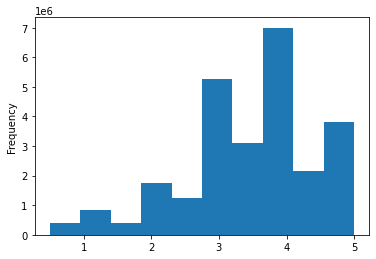

In [85]:
#Review for errors, create a histogram of the rating distributions, and then use the describe() method to print out some stats on central tendency and spread.
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()